# AE4465 (MM&A) - Lecture3 (HPP process)

A classical problem in maintenance is how to improve the reliability using mathematical models. In order to minimize failures in engineering systems, the designer must understand why and how failures occur. The knowledge of stochastic processes, governed by random numbers and distributions, is indispensable here.

If failures occur exponentially, meaning the unit fails constantly during a time interval $(t, t + dt]$ irrespective of time $t$, the system forms a HPP.

In an HPP failures occur randomly in $(t, t + dt]$ with probability $\lambda dt$ for constant $\lambda > 0$ and interarrival times between failures following an exponential distribution $$1 - e^{-\lambda t}$$.

In this notebook you will see how to capture the features of a HPP from real data and how to simulate the underlying process. You will also learn how to establish a fixed-time  maintenance schedule based on the HPP.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
import random

In [4]:
# Import the data in csv file
interarrival_times = pd.read_csv('data/les03_HPPdata.csv')
# Read the columns
print('The columns of the csv file are: ')
# Iterate over two arrays (column names and index) and print accordingly
for colname, i in zip(interarrival_times.columns, range(len(interarrival_times.columns))):
    print(i, '- Column: ', colname)
# print the 5 first rows of the dataframe
print(interarrival_times.head())

The columns of the csv file are: 
0 - Column:  Failure
1 - Column:  Interarrival time
   Failure  Interarrival time
0        1           1.033374
1        2           2.595481
2        3           4.592028
3        4           2.168895
4        5           3.088994


In [7]:
# calculate the calendar time points where the events have happened
global_times = [0]
global_time = 0
for interarrival_time in interarrival_times['Interarrival time']:
    global_time = interarrival_time + global_time
    global_times.append(global_time)

# calculate the mean value of the interarrival time
mean_interravaltime = np.mean(interarrival_times['Interarrival time'])
rate_arrival = 1 / mean_interravaltime
print('The rate of arrival is ', rate_arrival)

The rate of arrival is  0.20933528869805645


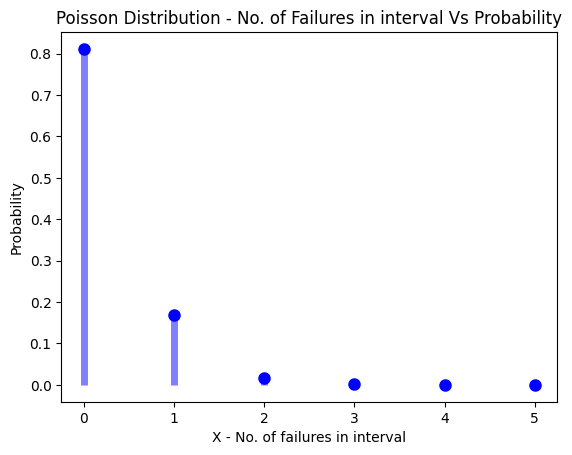

In [12]:
X = [0, 1, 2, 3, 4, 5]
# Probability values
poisson_pd = poisson.pmf(X, rate_arrival)

plt.plot(X, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability")
plt.xlabel("X - No. of failures in interval")
plt.title("Poisson Distribution - No. of Failures in interval Vs Probability")
plt.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)
plt.show()

In [23]:
uncatched_failures = []
for i in range(10):
    inter_arrivals = []
    for i in range(20):
        temp = random.expovariate(rate_arrival)
        inter_arrivals.append(temp)
    global_time = np.cumsum(inter_arrivals)
    preventive_maintenance_schedule = 1/rate_arrival
    inter_arrivals = np.array(inter_arrivals)
    failures = global_time[global_time < preventive_maintenance_schedule]
    uncatched_failures.extend(failures)
    print('Failures: ', failures)
    print('Doing a repair every ', preventive_maintenance_schedule)
print(uncatched_failures)


Failures:  [2.20761657]
Doing a repair every  4.77702544190909
Failures:  [3.18598563]
Doing a repair every  4.77702544190909
Failures:  [0.70921539 1.93566107 3.3874157 ]
Doing a repair every  4.77702544190909
Failures:  [1.02475588 1.43046861]
Doing a repair every  4.77702544190909
Failures:  [4.24233514 4.64436347]
Doing a repair every  4.77702544190909
Failures:  [0.64447554 3.49483169]
Doing a repair every  4.77702544190909
Failures:  [0.18966876]
Doing a repair every  4.77702544190909
Failures:  [0.1365416]
Doing a repair every  4.77702544190909
Failures:  []
Doing a repair every  4.77702544190909
Failures:  [2.92626994 4.04569093]
Doing a repair every  4.77702544190909
[2.207616569467327, 3.1859856258624015, 0.7092153857693833, 1.9356610708122428, 3.3874157037884878, 1.024755879531529, 1.430468608220349, 4.24233514390602, 4.644363471146394, 0.644475540716281, 3.494831692883717, 0.1896687551725555, 0.1365415983410339, 2.926269937793914, 4.04569093341679]
